<a href="https://colab.research.google.com/github/Franklinchalloh/dsc-running-jupyter-locally-lab/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESCRIBING THE QUESTION

## 1. SPECIFYING THE QUESTION

Determine if the mean of the number of blue_cars taken from postcodes starting with ‘75’ is at least similar to that of all the Paris postcodes. To investigate this, our hypothesis will be: 

1. The Null Hypothesis is that the mean of blue_cars taken in postcodes starting with ‘75’ is greater than or equal to that of all the Paris postcodes.

2. The Alternate Hypothesis is that the mean of blue_cars taken in postcodes starting with ‘75’ during the is less than that of all the Paris postcodes.



## 2. DEFINING THE METRIC FOR SUCCESS

It will be deemed successful if the Null hypothesis fails to be rejected, i.e. if it is true.


## 3. EXPERIMENTAL DESIGN

a) Loading Datasets and Preparing the Data.

b) Data Cleaning to deal with Anomalies and Outliers.

c) Exploratory Data Analysis (Univariate and Bivariate Analysis).

d) Hypothesis Testing to Implement the Solution.

e) Conclusions and Recommendation.


# DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [ ]:
# Description of the features.

Description = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
Description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [ ]:
# Dataset we'll work with.

autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Understanding the dataset parameters we'll primarily be working with.

autolib['Postal code'].nunique()

104

In [ ]:
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Confirming dates are from January to June.

autolib.date.unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [ ]:
print('The dataset has ' + str(autolib.shape[0]) + ' rows and ' + str(autolib.shape[1]) + ' columns')

The dataset has 16085 rows and 13 columns


In [ ]:
# Checking for null values

autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
autolib.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/30/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


# DATA CLEANING

Checking for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

In [ ]:
# The columns need to be synchronized e.g remove the space in Postal

autolib.head(1)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [ ]:
autolib.columns = autolib.columns.str.lower().str.replace(' ', '_')
autolib.head(1)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [ ]:
# We can also correct dayofweek to make it more readable

autolib.columns = autolib.columns.str.lower().str.replace('dayofweek', 'day_of_week')
autolib.head(1)

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20


In [ ]:
# The types of data are appropriate 

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
# There are no null values

autolib.isnull().any()

postal_code               False
date                      False
n_daily_data_points       False
day_of_week               False
day_type                  False
bluecars_taken_sum        False
bluecars_returned_sum     False
utilib_taken_sum          False
utilib_returned_sum       False
utilib_14_taken_sum       False
utilib_14_returned_sum    False
slots_freed_sum           False
slots_taken_sum           False
dtype: bool

In [ ]:
# There are no duplicates

autolib.duplicated().sum()

0

# DATA ANALYSIS

## 1. EXPLORATORY DATA ANALYSIS (EDA)

### 1.1 UNIVARIATE 

**a) Numerical**

In [ ]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


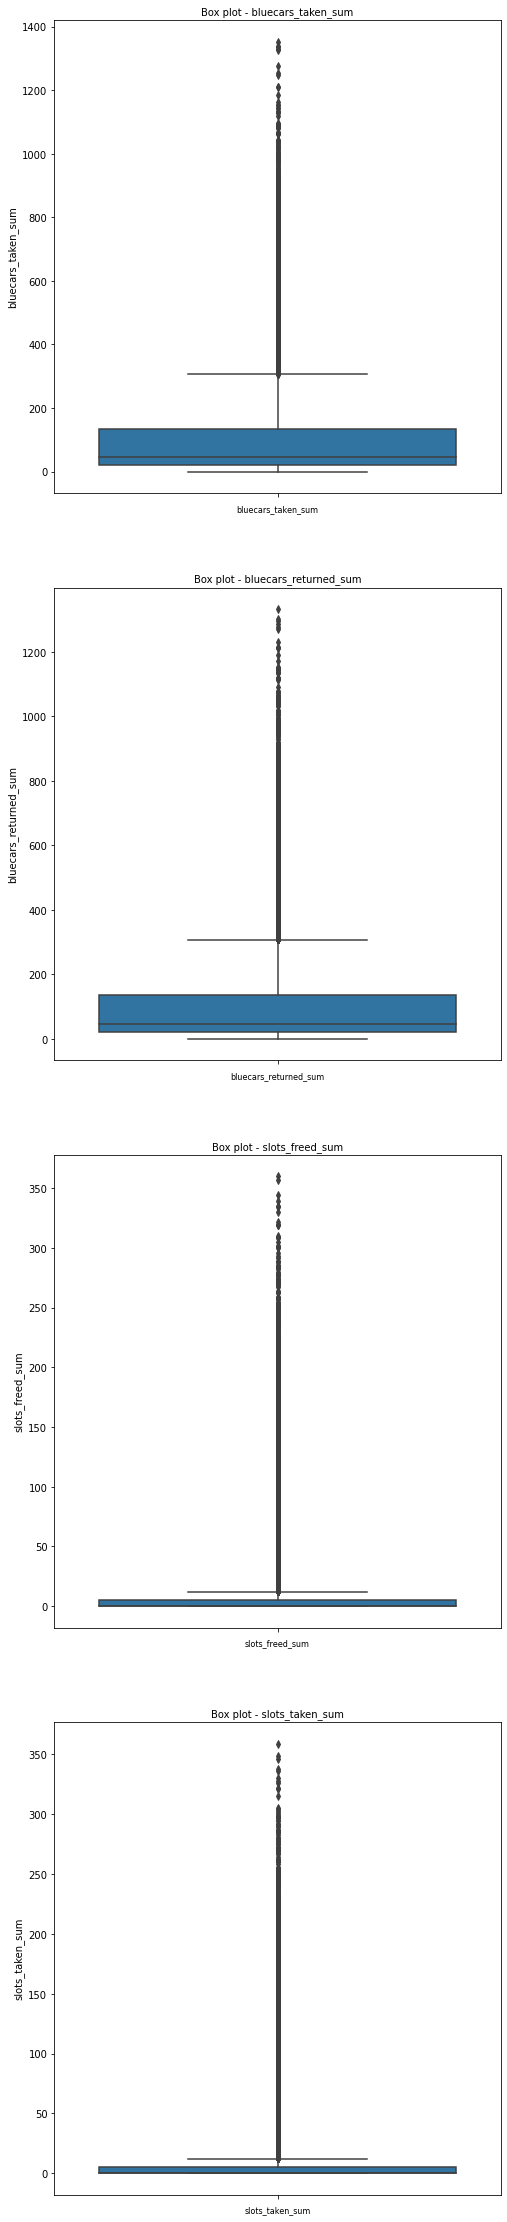

In [ ]:
col_names = ['bluecars_taken_sum','bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = autolib[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

In [ ]:
# Checking for Outliers

Q1_bluecars_taken_sum = autolib['bluecars_taken_sum'].quantile(.25)
Q3_bluecars_taken_sum = autolib['bluecars_taken_sum'].quantile(.75)

IQR_bluecars_taken_sum = Q3_bluecars_taken_sum - Q1_bluecars_taken_sum


anomalies = autolib[(autolib.bluecars_taken_sum < Q1_bluecars_taken_sum - 1.5* IQR_bluecars_taken_sum)  |
                    (autolib.bluecars_taken_sum > Q3_bluecars_taken_sum + 1.5 * IQR_bluecars_taken_sum) ]
print('BlueCar taken outliers are: ' + str(anomalies.bluecars_taken_sum.count()))

Q1_bluecars_returned_sum = autolib['bluecars_returned_sum'].quantile(.25)
Q3_bluecars_returned_sum = autolib['bluecars_returned_sum'].quantile(.75)

IQR_bluecars_returned_sum = Q3_bluecars_returned_sum - Q1_bluecars_returned_sum


anomalies = autolib[(autolib.bluecars_returned_sum < Q1_bluecars_returned_sum - 1.5* IQR_bluecars_returned_sum)  |
                    (autolib.bluecars_returned_sum > Q3_bluecars_returned_sum + 1.5 * IQR_bluecars_returned_sum) ]
print('BlueCar returned outliers are: ' + str(anomalies.bluecars_returned_sum.count()))

Q1_slots_freed_sum = autolib['slots_freed_sum'].quantile(.25)
Q3_slots_freed_sum = autolib['slots_freed_sum'].quantile(.75)

IQR_slots_freed_sum = Q3_slots_freed_sum - Q1_slots_freed_sum


anomalies = autolib[(autolib.slots_freed_sum < Q1_slots_freed_sum - 1.5* IQR_slots_freed_sum)  |
                    (autolib.slots_freed_sum > Q3_slots_freed_sum + 1.5 * IQR_slots_freed_sum) ]
print('Slots freed outliers are: ' + str(anomalies.slots_freed_sum.count()))

Q1_slots_taken_sum = autolib['slots_taken_sum'].quantile(.25)
Q3_slots_taken_sum = autolib['slots_taken_sum'].quantile(.75)

IQR_slots_taken_sum = Q3_slots_taken_sum - Q1_slots_taken_sum


anomalies = autolib[(autolib.slots_taken_sum < Q1_slots_taken_sum - 1.5* IQR_slots_taken_sum)  |
                    (autolib.slots_taken_sum > Q3_slots_taken_sum + 1.5 * IQR_slots_taken_sum) ]
print('Slots taken outliers are: ' + str(anomalies.slots_taken_sum.count()))

BlueCar taken outliers are: 2215
BlueCar returned outliers are: 2213
Slots freed outliers are: 3235
Slots taken outliers are: 3234


From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

**b) Categorical**

In [ ]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


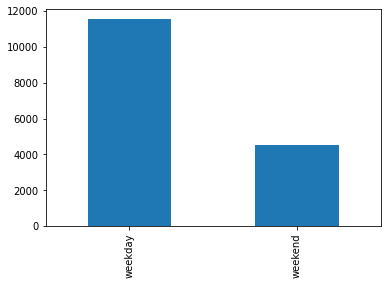

In [ ]:
# Records of the week (weekday and weekend)

autolib.day_type.value_counts().plot.bar()

The weekday contains the majority of the data, suggesting most of the activity occurs then. Due to this, we'll be using the weekday for our analysis. during the hypothesis testing. Furthermore, since we'll be using the z-score, the larger the data, the more accurate the results will be.

**c) Summary Statistics**

In [ ]:
autolib.describe()

,postal_code,n_daily_data_points,day_of_week,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
# Central Tendancies 

# mean
print('The mean of Bluecars taken: ' +str(autolib.bluecars_taken_sum.mean()))
print('The mean of Bluecars returned: ' +str(autolib.bluecars_returned_sum.mean()))
print('The mean of slots freed: ' +str(autolib.slots_freed_sum.mean()))
print('The mean of slots taken: ' +str(autolib.slots_taken_sum.mean()))

# The means of bluecars taken and those returned are almost similar.
# The means of slots taken and those freed are also almost similar.

The mean of Bluecars taken: 125.92695057506994
The mean of Bluecars returned: 125.912713708424
The mean of slots freed: 22.62903326080199
The mean of slots taken: 22.629281939695367


In [ ]:
# median
print('The median of Bluecars taken: ' +str(autolib.bluecars_taken_sum.median()))
print('The median of Bluecars returned: ' +str(autolib.bluecars_returned_sum.median()))
print('The median of slots freed: ' +str(autolib.slots_freed_sum.median()))
print('The median of slots taken: ' +str(autolib.slots_taken_sum.median()))

# The medians of bluecars taken and those returned are similar.
# The means of slots taken and those freed are also similar.

The median of Bluecars taken: 46.0
The median of Bluecars returned: 46.0
The median of slots freed: 0.0
The median of slots taken: 0.0


In [ ]:
# mode
print('The mode of Bluecars taken: ' +str(autolib.bluecars_taken_sum.mode()))
print('The mode of Bluecars returned: ' +str(autolib.bluecars_returned_sum.mode()))
print('The mode of slots freed: ' +str(autolib.slots_freed_sum.mode()))
print('The mode of slots taken: ' +str(autolib.slots_taken_sum.mode()))

# The modes of the numeric fields are unimodal, indicating the data is sampled from one population i.e. Paris

The mode of Bluecars taken: 0    12
dtype: int64
The mode of Bluecars returned: 0    13
dtype: int64
The mode of slots freed: 0    0
dtype: int64
The mode of slots taken: 0    0
dtype: int64


In [ ]:
# range
print('The range of Bluecars taken: ' +str(autolib.bluecars_taken_sum.max() - autolib.bluecars_taken_sum.min()))
print('The range of Bluecars returned: ' +str(autolib.bluecars_returned_sum.max() - autolib.bluecars_returned_sum.min()))
print('The range of slots freed: ' +str(autolib.slots_freed_sum.max()- autolib.slots_freed_sum.min()))
print('The range of slots taken: ' +str(autolib.slots_taken_sum.max() - autolib.slots_taken_sum.min()))

The range of Bluecars taken: 1352
The range of Bluecars returned: 1332
The range of slots freed: 360
The range of slots taken: 359


In [ ]:
# standard deviation
print('The standard deviation of Bluecars taken: ' +str(autolib.bluecars_taken_sum.std()))
print('The standard deviation of Bluecars returned: ' +str(autolib.bluecars_returned_sum.std()))
print('The standard deviation of slots freed: ' +str(autolib.slots_freed_sum.std()))
print('The standard deviation of slots taken: ' +str(autolib.slots_taken_sum.std()))

# The standard deviation of bluecars taken and those returned are almost similar.
# The standard deviation of slots taken and those freed are also almost similar.
# The standard deviations mirror the ranges, in that the values with more range show higher
# values of standard deviation, meaning the data is more spread out with increasing deviation.

The standard deviation of Bluecars taken: 185.42657876727893
The standard deviation of Bluecars returned: 185.50153480148427
The standard deviation of slots freed: 52.12026333757879
The standard deviation of slots taken: 52.146029870452566


In [ ]:
# variance
print('The variance of Bluecars taken: ' +str(autolib.bluecars_taken_sum.var()))
print('The variance of Bluecars returned: ' +str(autolib.bluecars_returned_sum.var()))
print('The variance of slots freed: ' +str(autolib.slots_freed_sum.var()))
print('The variance of slots taken: ' +str(autolib.slots_taken_sum.var()))

# The variance of bluecars taken and those returned are almost similar.
# The variance of slots taken and those freed are also almost similar.

# Similar to standard deviation above in that, the greater the variance, the greater the spread 
# in the data about the mean.

The variance of Bluecars taken: 34383.01611333789
The variance of Bluecars returned: 34410.819413706275
The variance of slots freed: 2716.52185037856
The variance of slots taken: 2719.2084312501315


In [ ]:
# quantiles
print('The quantiles of Bluecars taken: \n' +str(autolib.bluecars_taken_sum.quantile([0.25,0.5,0.75])))
print('The quantiles of Bluecars returned: \n' +str(autolib.bluecars_returned_sum.quantile([0.25,0.5,0.75])))
print('The quantiles of slots freed: \n' +str(autolib.slots_freed_sum.quantile([0.25,0.5,0.75])))
print('The quantiles of slots taken: \n' +str(autolib.slots_taken_sum.quantile([0.25,0.5,0.75])))

# The quantiles of bluecars taken and those returned are similar.
# The quantiles of slots taken and those freed are also similar.

The quantiles of Bluecars taken: 
0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64
The quantiles of Bluecars returned: 
0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64
The quantiles of slots freed: 
0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_freed_sum, dtype: float64
The quantiles of slots taken: 
0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


In [ ]:
# skewness
print('The skewness of Bluecars taken: ' +str(autolib.bluecars_taken_sum.skew()))
print('The skewness of Bluecars returned: ' +str(autolib.bluecars_returned_sum.skew()))
print('The skewness of slots freed: ' +str(autolib.slots_freed_sum.skew()))
print('The skewness of slots taken: ' +str(autolib.slots_taken_sum.skew()))

# The positive values indicates that the tail of the data is right-skewed.

The skewness of Bluecars taken: 2.4063548974959086
The skewness of Bluecars returned: 2.412084978838923
The skewness of slots freed: 2.5974057870090994
The skewness of slots taken: 2.5969043474634987


In [ ]:
# kurtosis
print('The kurtosis of Bluecars taken: ' +str(autolib.bluecars_taken_sum.kurt()))
print('The kurtosis of Bluecars returned: ' +str(autolib.bluecars_returned_sum.kurt()))
print('The kurtosis of slots freed: ' +str(autolib.slots_freed_sum.kurt()))
print('The kurtosis of slots taken: ' +str(autolib.slots_taken_sum.kurt()))

# The data has positive kurtosis indicating that the distribution has heavier tails 
# and a taller peak than the normal distribution. 

The kurtosis of Bluecars taken: 6.172692305510042
The kurtosis of Bluecars returned: 6.1862880957582345
The kurtosis of slots freed: 6.454514382612528
The kurtosis of slots taken: 6.442553073772169


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

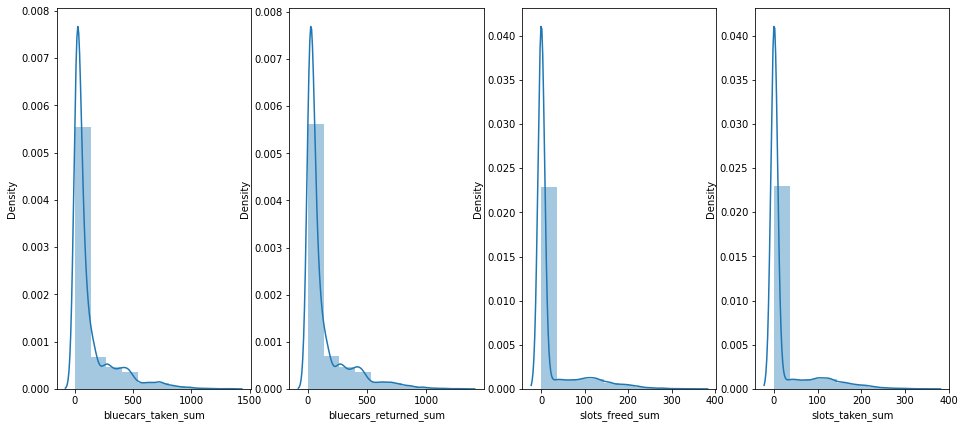

In [ ]:
# Plotting Histogram to show the above

n_bins = 10

fig, (ax1,ax2,ax3, ax4) = plt.subplots(1, 4, figsize= (16,7))

sns.distplot(autolib.bluecars_taken_sum, ax=ax1, bins= n_bins)
sns.distplot(autolib.bluecars_returned_sum, ax=ax2, bins= n_bins)
sns.distplot(autolib.slots_freed_sum, ax=ax3, bins= n_bins)
sns.distplot(autolib.slots_taken_sum, ax=ax4, bins= n_bins)

# The data is right-skewed with a heavy tail as was discovered by the skewness and kurtosis.

**d) Univariate Analysis Recommendation**

The data is heavily skewed to the right i.e. leptokurtic, as was suspected due to the large number of outliers. This suggests that our initial decision to keep them is justified as this is not a normally distributed dataset. Furthermore, the Bluecar taken and returned columns seem to have similar statistical bearing, hence using either as the target variable in place of the other would be justified. We have decided to use the Bluecar taken column as our target variable, however, future analysis can be done with the Bluecar returned column and the results compared.

### 1.2 BIVARIATE

**a) Numeric**

In [ ]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


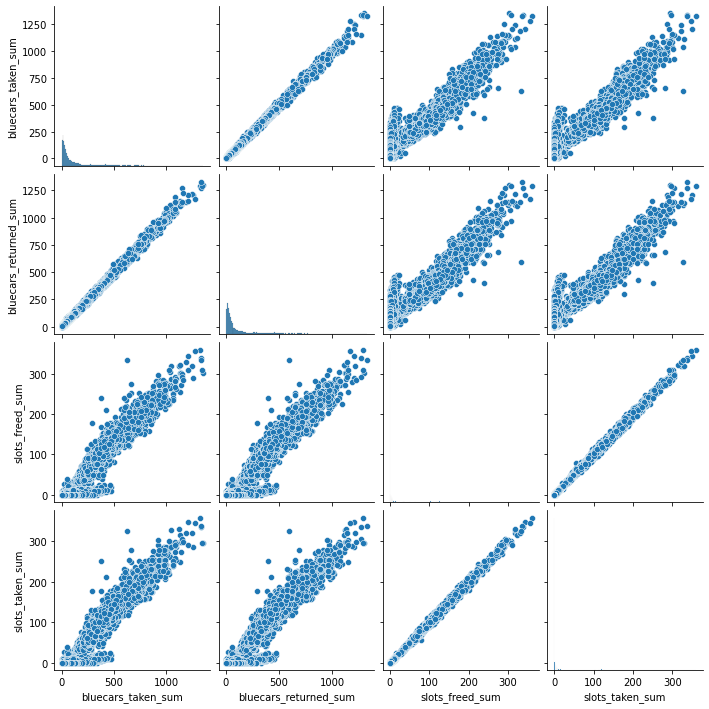

In [ ]:
Numerical_data = autolib.drop(['postal_code', 'date', 'n_daily_data_points', 'day_of_week', 
                               'day_type', 'utilib_taken_sum', 'utilib_returned_sum', 
                               'utilib_14_taken_sum', 'utilib_14_returned_sum'], axis=1)
sns.pairplot(Numerical_data)

# The plots below indicate a strong positive linear correlation between the variables.

In [ ]:
pearson_coeff_Bluecar = autolib["bluecars_taken_sum"].corr(autolib["bluecars_returned_sum"], method="pearson") 
print('Pearson coefficient of Bluecar taken and returned is: ' + str(pearson_coeff_Bluecar))

pearson_coeff_Bluecar_Free = autolib["bluecars_taken_sum"].corr(autolib["slots_freed_sum"], method="pearson") 
print('Pearson coefficient of Bluecar taken and slots freed is: ' + str(pearson_coeff_Bluecar_Free))

pearson_coeff_Bluecar_Slots = autolib["bluecars_taken_sum"].corr(autolib["slots_taken_sum"], method="pearson") 
print('Pearson coefficient of Bluecar taken and slots taken is: ' + str(pearson_coeff_Bluecar_Slots))

pearson_coeff_Bluecar_return = autolib["bluecars_returned_sum"].corr(autolib["slots_freed_sum"], method="pearson") 
print('Pearson coefficient of Bluecar taken and slots freed is: ' + str(pearson_coeff_Bluecar_return))

pearson_coeff_Bluecar_return_slots = autolib["bluecars_returned_sum"].corr(autolib["slots_taken_sum"], method="pearson") 
print('Pearson coefficient of Bluecar taken and slots taken is: ' + str(pearson_coeff_Bluecar_return_slots))

pearson_coeff_slots = autolib["slots_taken_sum"].corr(autolib["slots_freed_sum"], method="pearson") 
print('Pearson coefficient of slots taken and slots freed is: ' + str(pearson_coeff_slots))

# Strong correlation is seen as was discovered on the sns plot, with all values above 0.94

Pearson coefficient of Bluecar taken and returned is: 0.9986597051672199
Pearson coefficient of Bluecar taken and slots freed is: 0.9485748412412782
Pearson coefficient of Bluecar taken and slots taken is: 0.947995965206426
Pearson coefficient of Bluecar taken and slots freed is: 0.9482575524525811
Pearson coefficient of Bluecar taken and slots taken is: 0.9487708979912494
Pearson coefficient of slots taken and slots freed is: 0.9992211293145634


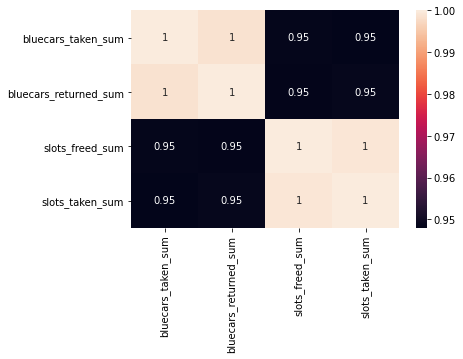

In [ ]:
sns.heatmap(Numerical_data.corr(), annot=True)
plt.show()

# This heatmap further cements the correlation found between the variables.

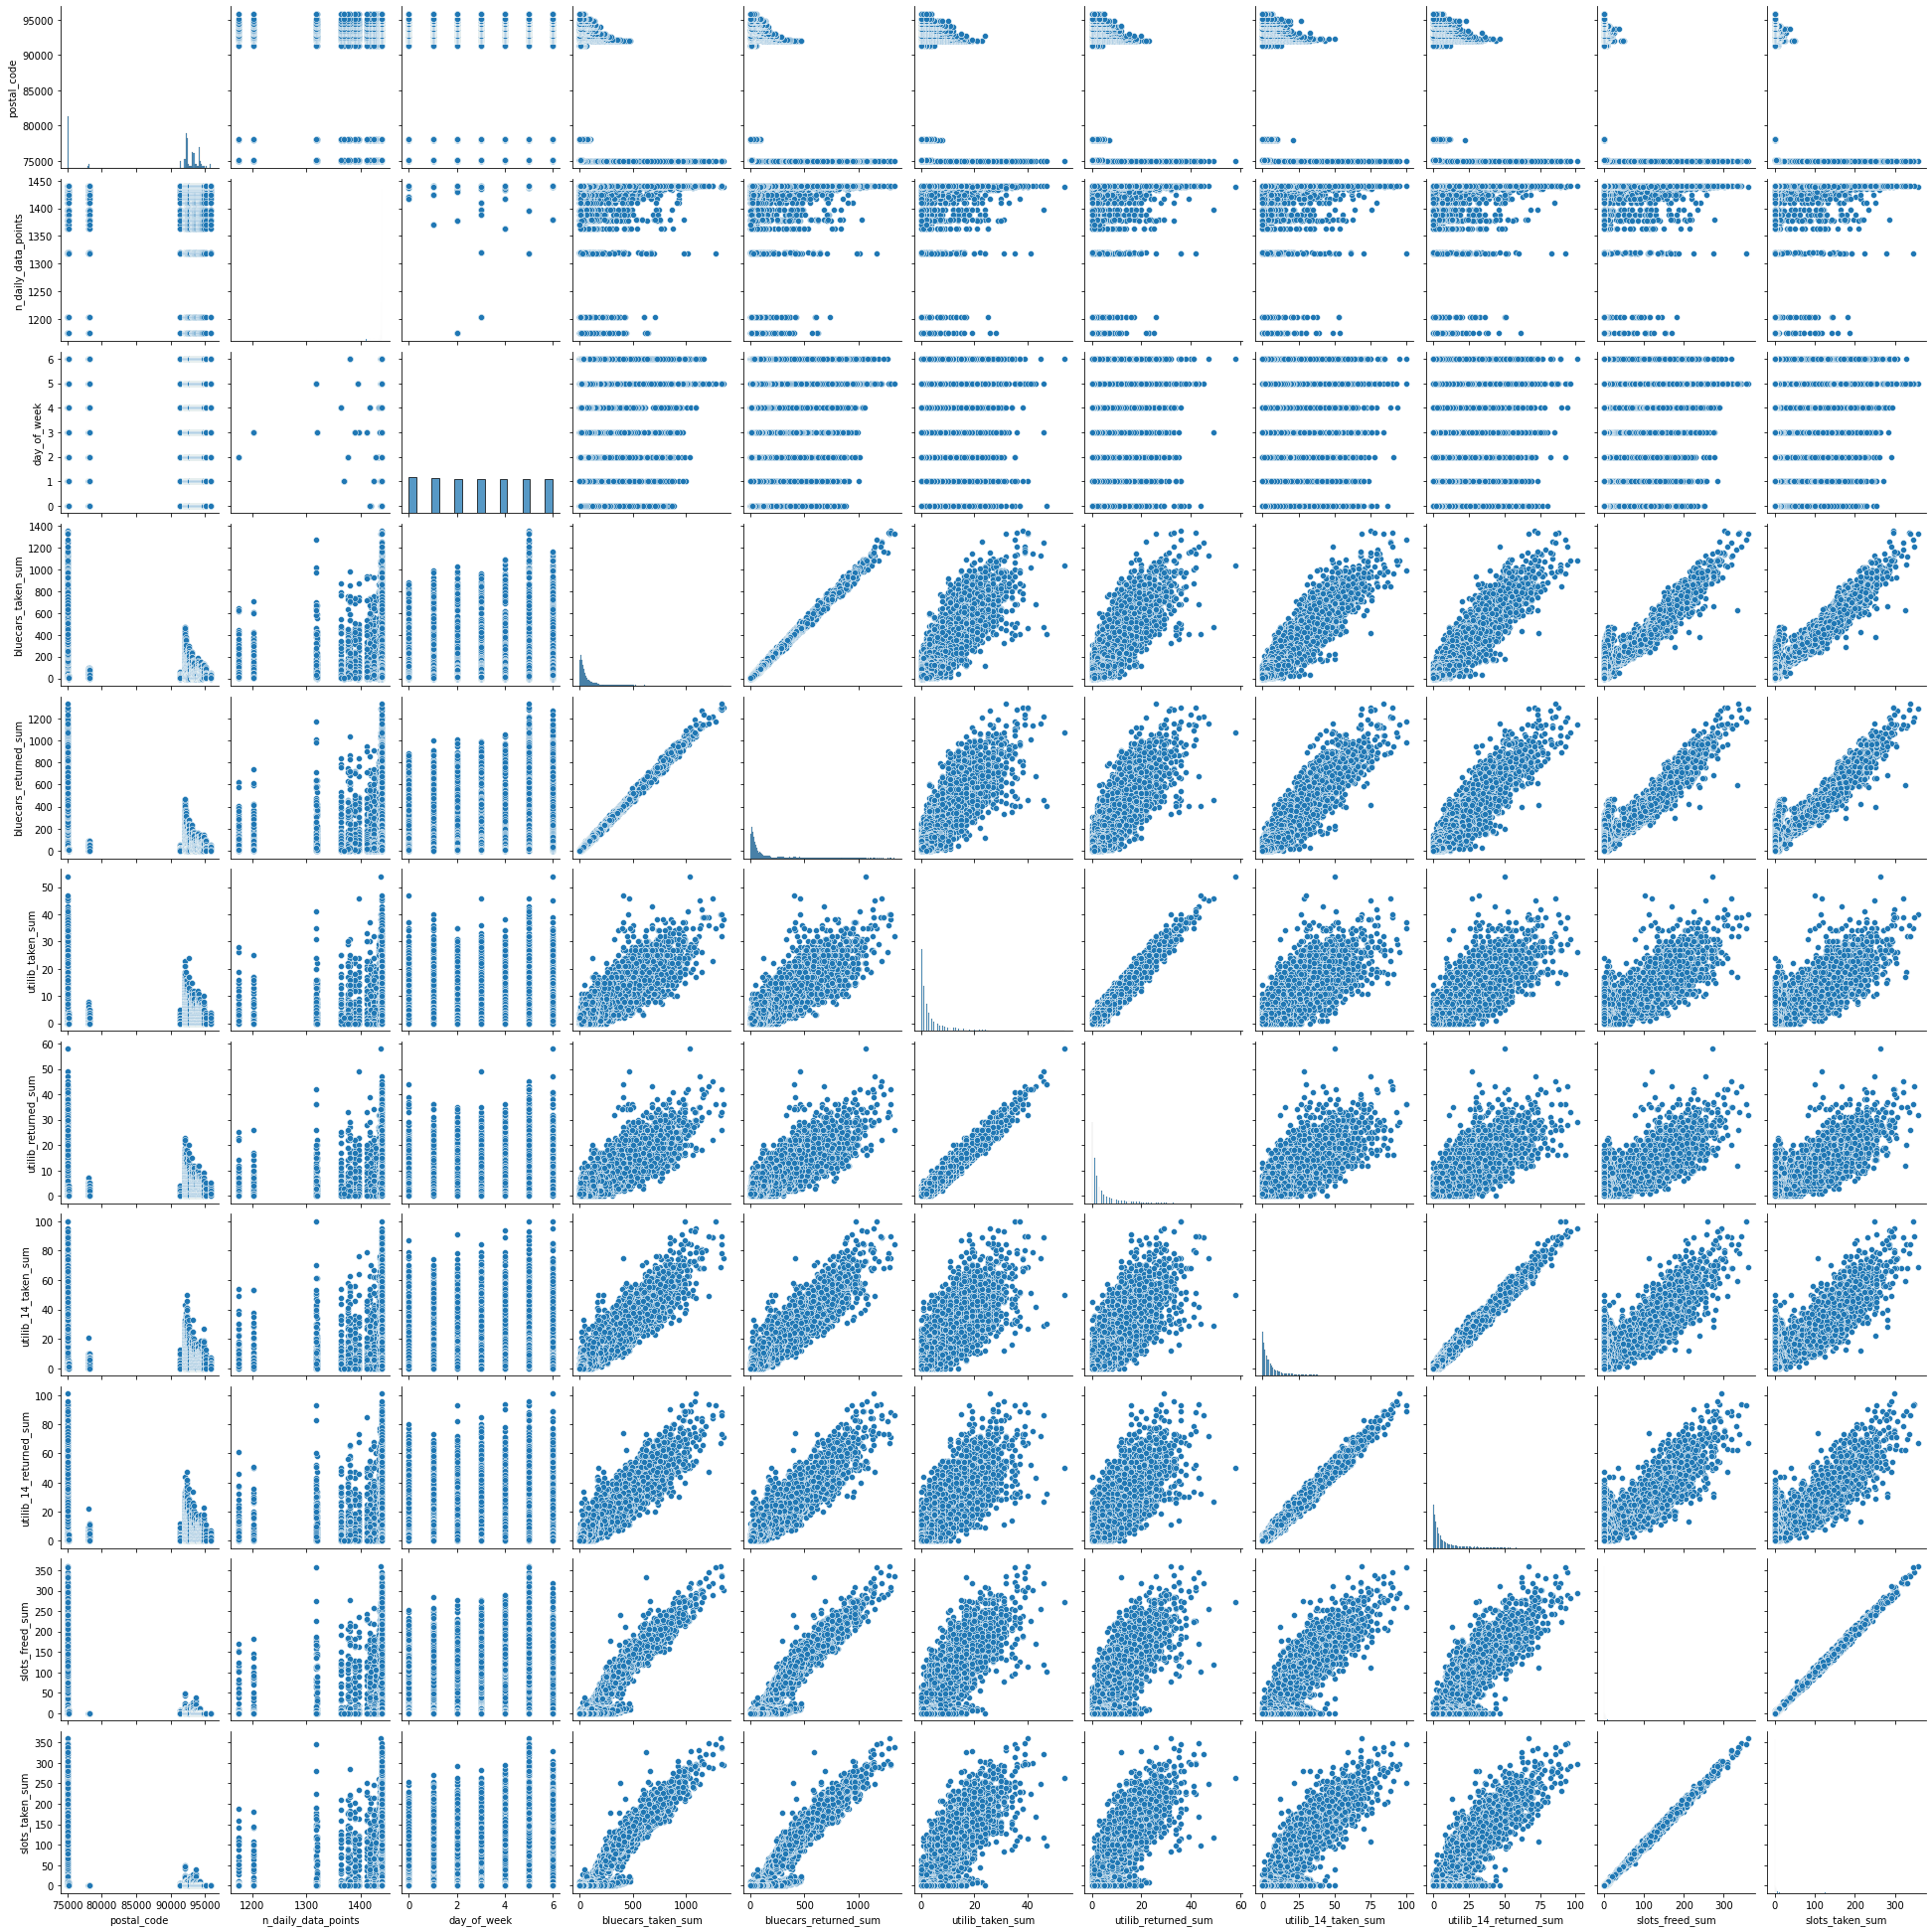

In [ ]:
sns.pairplot(autolib)

# a larger view of the correlation in the data, just for reference.

**b) Categorical**

In [ ]:
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   day_of_week             16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


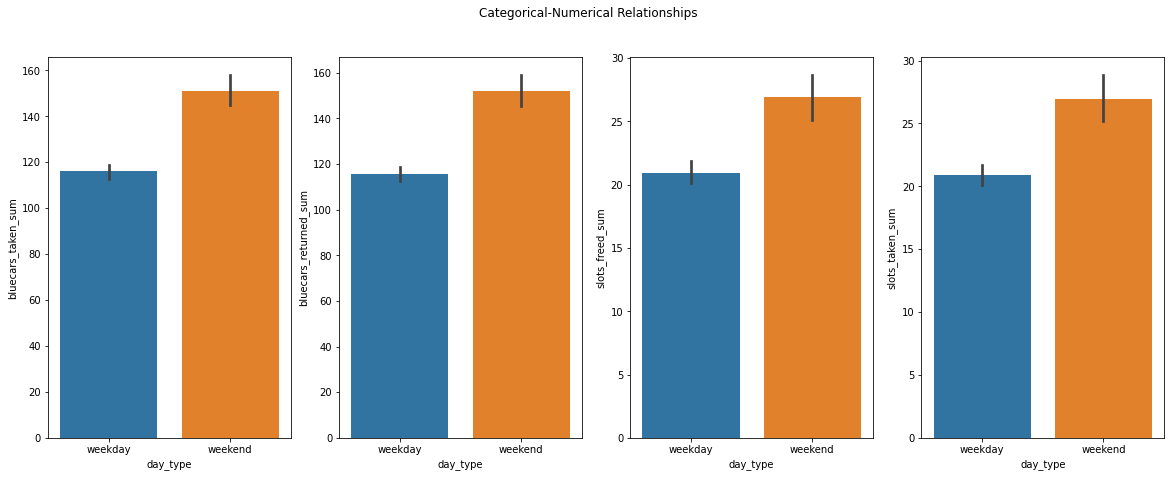

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= autolib.day_type, y= autolib.bluecars_taken_sum, ax=ax1)
sns.barplot(x= autolib.day_type, y= autolib.bluecars_returned_sum, ax=ax2)
sns.barplot(x= autolib.day_type, y= autolib.slots_freed_sum, ax=ax3)
sns.barplot(x= autolib.day_type, y= autolib.slots_taken_sum, ax=ax4)
plt.show()

# Contrary to what we believed in the univariate analysis, the weekend seems to have more activity.
# This could be due to the weekday having more days(5) than the weekend (2) days.

**c) Bivariate Analysis Recommendation**

From the above, we can see that the weekends are the busiest, and this could be due to weekend activities that people have time to engage in, requiring them to use the service. Even though this contradicts the univariate analysis, we will still use the weekday to conduct our hypothesis testing, since the weekdays have more days, hence more rows of data to work with. The more the data, the better our model will be.

# HYPOTHESIS TESTING

Determine if the mean of the number of blue_cars taken from postcodes starting with ‘75’ is at least similar to that of all the Paris postcodes. To investigate this, our hypothesis will be: 

a) The Null Hypothesis is that the mean of blue_cars taken in postcodes starting with ‘75’ during the weekdays is greater than or equal to that of all the Paris postcodes during the weekdays.

b) The Alternate Hypothesis is that the mean of blue_cars taken in postcodes starting with ‘75’ during the weekdays is less than that of all the Paris postcodes during the weekdays.



In [ ]:
# Considering the two postcodes are in the city area of Paris, the city will be extracted
# from the larger Paris Metropolitan area via the postcodes, since the postcodes of Paris City start with ‘75’. 

autolib.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [ ]:
# Target Population

Target = autolib.copy(deep = True)
Target.postal_code = Target.postal_code.astype(str)
Target.postal_code.dtype

dtype('O')

In [ ]:
Target = Target.loc[Target.postal_code.str.startswith('75')]
Target.postal_code = Target.postal_code.astype(int)
Target.postal_code.dtype

dtype('int64')

In [ ]:
Target.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116])

In [ ]:
print('The Paris City data has: ' + str(Target.shape[0]) + ' rows')

The Paris City data has: 3431 rows


In [ ]:
# Selecting weekdays only

Target = Target[Target.day_type == 'weekday']

print('The Paris City data for the weekdays has: ' + str(Target.shape[0]) + ' rows')

# As was expected, the weekday data contains more data then the weekends.

The Paris City data for the weekdays has: 2463 rows


In [ ]:
# We can see that all postcodes have 111 or 112 rows of data each

Target.postal_code.value_counts()

75019    112
75017    112
75004    112
75006    112
75008    112
75010    112
75012    112
75014    112
75016    112
75018    112
75020    112
75112    112
75001    112
75003    112
75005    112
75007    112
75009    112
75011    112
75013    112
75015    112
75002    112
75116    111
Name: postal_code, dtype: int64

In [ ]:
Sample = Target.copy(deep= True)
Sample.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], 
            axis = 1, inplace= True)
Sample = Sample.groupby('postal_code', group_keys=False).apply(lambda x: x.sample(30, random_state=10))
Sample

,postal_code,date,n_daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
143,75001,6/7/2018,1439,3,weekday,113,113,20,18
127,75001,5/22/2018,1438,1,weekday,142,144,30,32
104,75001,4/18/2018,1377,2,weekday,124,124,16,17
67,75001,3/12/2018,1440,0,weekday,99,98,15,17
74,75001,3/19/2018,1440,0,weekday,99,96,16,17
...,...,...,...,...,...,...,...,...,...
3357,75116,3/26/2018,1439,0,weekday,19,15,6,5
3411,75116,5/30/2018,1440,2,weekday,14,16,6,6
3279,75116,1/4/2018,1320,3,weekday,4,5,2,1
3374,75116,4/12/2018,1440,3,weekday,10,9,0,0


In [ ]:
# previuosly we found population mean = 125.927
# and population standard deviation = 185.427

population_mean = autolib.bluecars_returned_sum.mean()
population_deviation = autolib.bluecars_taken_sum.std()
sample_mean = Sample.bluecars_taken_sum.mean()
sample_deviation = Sample.bluecars_taken_sum.std()

population_mean, population_deviation, sample_mean, sample_deviation

(125.912713708424, 185.42657876727893, 354.380303030303, 212.801486725454)

In [ ]:
# Calculating the z-score

z = (sample_mean - population_mean) / population_deviation
print('The Z-score is: ', z)


# The z-score tells us that the sample mean is 1.23 standard deviations away from the population mean
# this is within the 1.645 critical value (since it is a one-tailed test), which is the area where 95% confidence level lies. We can therefore 
# not reject the null hypothesis. 

The Z-score is:  1.2321188841466952


In [ ]:
p_value = 1 - stats.norm.cdf(z)
p_value

# The p value is greater than the alpha therefore, it is not statistically significant. 
# This indicates strong evidence for the null hypothesis.
 

0.10895233909840663

In [ ]:
# Additional Information

point_estimate = population_mean - sample_mean
point_estimate

-228.46758932187902

In [ ]:
# Additional Information

sample_size = Sample.shape[0]
std_error = sample_deviation / np.sqrt(sample_size)

stats.norm.interval(0.95, loc=sample_mean, scale=std_error)

# The interval estimate of the sample mean indicates the range through which the sample
# mean will be within the 95% Confidence level of the population mean.

(338.1453595489678, 370.61524651163825)

**Test Sensitivity**

In [ ]:
# Effect of changing the sample size, using a sample size of 90 and a random_state of 20

Sample = Target.copy(deep= True)
Sample.drop(['utilib_taken_sum','utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum'], 
            axis = 1, inplace= True)
Sample = Sample.groupby('postal_code', group_keys=False).apply(lambda x: x.sample(90, random_state=20))
sample_mean = Sample.bluecars_taken_sum.mean()
sample_deviation = Sample.bluecars_taken_sum.std()

population_mean, population_deviation, sample_mean, sample_deviation

(125.912713708424, 185.42657876727893, 356.35959595959594, 219.2703182022267)

In [ ]:
z = (sample_mean - population_mean) / population_deviation
print('The Z-score is: ', z)

p_value = 1 - stats.norm.cdf(z)
p_value

# As can be seen, there is no significant difference, proving the rigidity of our method.

The Z-score is:  1.2427931517864874


0.10697203336719552

CONCLUSION

The Test sensitivity was done by changing the sample size to 90 samples per postcode. There was no significant difference, proving the rigidity of the method. Considering the mean for the ‘75’ code postcodes was higher than the mean of all the postcodes, the Z-score (1.23) being less than the Z-critical (1.625), and the p value (0.109) being greater than the alpha (0.05), the Null Hypothesis failed to be rejected. This means that indeed, these postcodes that start with ‘75’ i.e. those related to regions within the City Centre and it’s immediate environs, have a higher mean of bluecars being taken daily.


# RECOMMENDATION

The test suggests that the City Centre area of Paris experiences more customer engagement with the Bluecars. This suggests that the economic activities related to the City have an effect on the rate at which Bluecars are used. For future research, data regarding why the customer used a bluecar, e.g. Leisure, Work, Tourism etc, should be gathered to enable analysis that will show which activities boosted the use of the Bluecars most.